# Task 1 — Sentiment Analysis
**Slash Mark Internship Project**

Classifies text as Positive, Negative, or Neutral.

Tech: Python, scikit-learn, NLTK, TF-IDF

In [1]:
!pip install scikit-learn pandas nltk --quiet

In [2]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("stopwords", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)
nltk.download("punkt_tab", quiet=True)

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2 — Create Dataset

In [3]:
data = {
    "text": [
        # Positive
        "This product is absolutely amazing! Highly recommend it.",
        "Great experience, the food was delicious and service was excellent.",
        "I love this! Best purchase I have ever made.",
        "Fantastic quality, arrived quickly and works perfectly.",
        "Outstanding customer service, very happy with my order.",
        "The movie was wonderful and very entertaining.",
        "Excellent taste, will definitely come back again!",
        "Super fast delivery, product exactly as described. Very satisfied.",
        "Amazing ambiance, the staff was so friendly and welcoming.",
        "Really good value for money, I am very pleased.",
        "The app works flawlessly, love the new features.",
        "Brilliant service! Everything was perfect from start to finish.",
        "Very happy with the results, exceeded my expectations.",
        "Wonderful experience overall, would strongly recommend to friends.",
        "Great product, easy to use and very effective.",
        # Negative
        "Terrible product, broke after just one day of use.",
        "Worst experience ever. The food was cold and tasteless.",
        "Very disappointed, the quality is extremely poor.",
        "Do not buy this! Complete waste of money.",
        "Horrible customer service, they ignored all my complaints.",
        "The movie was boring and a total disappointment.",
        "Awful taste, I could not even finish my meal.",
        "Delivery was very late and the item arrived damaged.",
        "Rude staff and dirty place. Will never return.",
        "Very bad quality, not worth the price at all.",
        "The app keeps crashing, absolutely useless.",
        "Dreadful experience, nothing worked as expected.",
        "Very unsatisfied with the purchase, total letdown.",
        "Worst restaurant I have ever been to, avoid at all costs.",
        "Broken on arrival, terrible packaging and no refund offered.",
        # Neutral
        "The product is okay, nothing special but gets the job done.",
        "Average food, nothing remarkable but not bad either.",
        "It is fine I guess, met basic expectations.",
        "Decent enough for the price, could be better.",
        "The service was acceptable, not great not terrible.",
        "The film had its moments but was mostly average.",
        "Food was edible but nothing to write home about.",
        "Delivery was on time, product is standard quality.",
        "Staff were neutral, environment was okay.",
        "It works as described, nothing more nothing less.",
        "The app is functional but needs improvement.",
        "Experience was mediocre, room for improvement.",
        "Product is satisfactory but the competition offers more.",
        "Reasonable quality for the price paid.",
        "Not impressed but not disappointed either, just average."
    ],
    "label": ["positive"]*15 + ["negative"]*15 + ["neutral"]*15
}

df = pd.DataFrame(data)
print(f"Dataset created! Total samples: {len(df)}")
print(df["label"].value_counts())
df.head()

Dataset created! Total samples: 45
label
positive    15
negative    15
neutral     15
Name: count, dtype: int64


,text,label
0,This product is absolutely amazing! Highly rec...,positive
1,"Great experience, the food was delicious and s...",positive
2,I love this! Best purchase I have ever made.,positive
3,"Fantastic quality, arrived quickly and works p...",positive
4,"Outstanding customer service, very happy with ...",positive


## Step 3 — Text Preprocessing

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(preprocess_text)

print("Text Preprocessing Done!")
print("Original:", df["text"][0])
print("Cleaned: ", df["cleaned_text"][0])

Text Preprocessing Done!
Original: This product is absolutely amazing! Highly recommend it.
Cleaned:  product absolutely amazing highly recommend


## Step 4 — TF-IDF Feature Extraction

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("TF-IDF Done!")
print(f"Feature matrix shape: {X.shape}")
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

TF-IDF Done!
Feature matrix shape: (45, 335)
Train samples: 36, Test samples: 9


## Step 5 — Train Models

In [7]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1  = f1_score(y_test, lr_pred, average="weighted")

# SVM
svm_model = LinearSVC(random_state=42, max_iter=2000)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1  = f1_score(y_test, svm_pred, average="weighted")

print("=== Logistic Regression ===")
print(f"Accuracy : {lr_acc*100:.2f}%")
print(f"F1 Score : {lr_f1:.4f}")
print()
print("=== SVM ===")
print(f"Accuracy : {svm_acc*100:.2f}%")
print(f"F1 Score : {svm_f1:.4f}")

=== Logistic Regression ===
Accuracy : 44.44%
F1 Score : 0.4444

=== SVM ===
Accuracy : 44.44%
F1 Score : 0.4444


## Step 6 — Classification Report

In [8]:
print("Classification Report — Logistic Regression")
print("="*55)
print(classification_report(y_test, lr_pred))
print("Classification Report — SVM")
print("="*55)
print(classification_report(y_test, svm_pred))

Classification Report — Logistic Regression
              precision    recall  f1-score   support

    negative       0.40      0.67      0.50         3
     neutral       1.00      0.33      0.50         3
    positive       0.33      0.33      0.33         3

    accuracy                           0.44         9
   macro avg       0.58      0.44      0.44         9
weighted avg       0.58      0.44      0.44         9

Classification Report — SVM
              precision    recall  f1-score   support

    negative       0.40      0.67      0.50         3
     neutral       1.00      0.33      0.50         3
    positive       0.33      0.33      0.33         3

    accuracy                           0.44         9
   macro avg       0.58      0.44      0.44         9
weighted avg       0.58      0.44      0.44         9



## Step 7 — Confusion Matrix

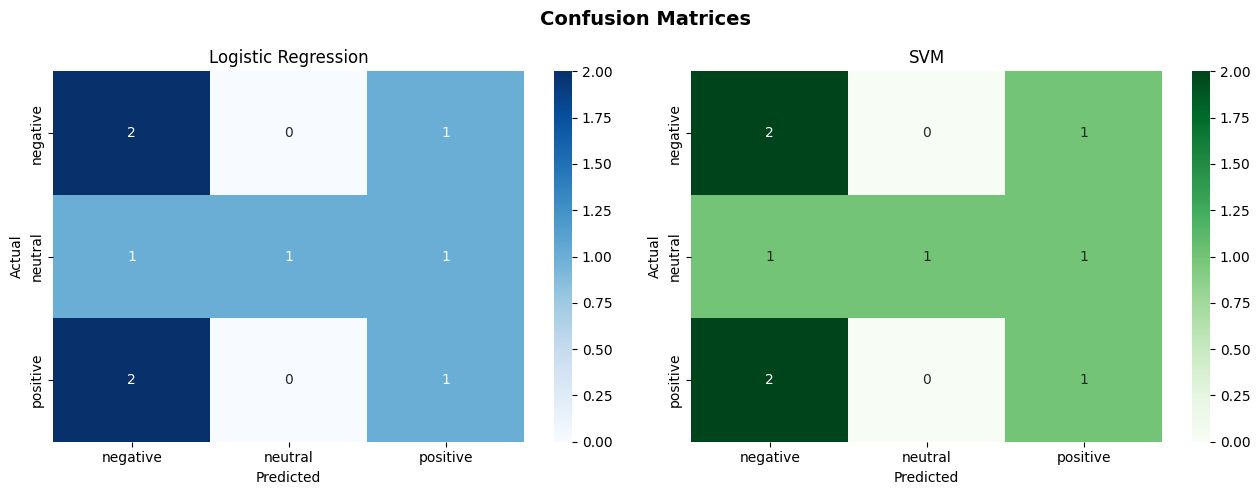

Saved: confusion_matrix.png


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
labels = ["negative", "neutral", "positive"]

cm_lr = confusion_matrix(y_test, lr_pred, labels=labels)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("Actual")

cm_svm = confusion_matrix(y_test, svm_pred, labels=labels)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("SVM")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("Actual")

plt.suptitle("Confusion Matrices", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: confusion_matrix.png")

## Step 8 — Model Comparison Chart

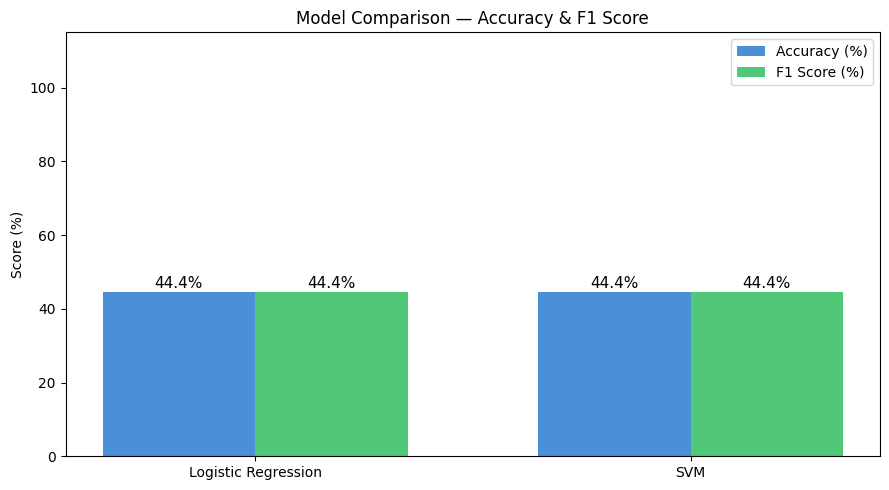

Saved: model_comparison.png


In [10]:
models = ["Logistic Regression", "SVM"]
accs = [lr_acc*100, svm_acc*100]
f1s  = [lr_f1*100,  svm_f1*100]
x = range(len(models))
w = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
b1 = ax.bar([i-w/2 for i in x], accs, w, label="Accuracy (%)", color="#4A90D9")
b2 = ax.bar([i+w/2 for i in x], f1s,  w, label="F1 Score (%)",  color="#50C878")
ax.set_xticks(list(x)); ax.set_xticklabels(models)
ax.set_ylim(0, 115); ax.set_ylabel("Score (%)")
ax.set_title("Model Comparison — Accuracy & F1 Score")
ax.legend()
for b in list(b1)+list(b2):
    ax.annotate(f"{b.get_height():.1f}%",
                xy=(b.get_x()+b.get_width()/2, b.get_height()),
                xytext=(0,3), textcoords="offset points", ha="center", fontsize=11)
plt.tight_layout()
plt.savefig("model_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: model_comparison.png")

## Step 9 — Predict Sentiment on New Text

In [11]:
def predict_sentiment(text, model=lr_model):
    cleaned = preprocess_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    emoji = {"positive": "POSITIVE", "negative": "NEGATIVE", "neutral": "NEUTRAL"}
    return emoji[pred]

tests = [
    "This restaurant is absolutely fantastic, I loved every dish!",
    "The product stopped working after two days, very disappointed.",
    "It is an okay product, does what it says nothing more.",
    "Worst customer service I have ever experienced!",
    "Really impressed with quality and fast delivery, thank you!",
    "The movie was neither good nor bad, just average."
]

print("Sentiment Predictions")
print("="*65)
for t in tests:
    print(f"Text    : {t}")
    print(f"Result  : {predict_sentiment(t)}")
    print("-"*65)

Sentiment Predictions
Text    : This restaurant is absolutely fantastic, I loved every dish!
Result  : NEGATIVE
-----------------------------------------------------------------
Text    : The product stopped working after two days, very disappointed.
Result  : NEGATIVE
-----------------------------------------------------------------
Text    : It is an okay product, does what it says nothing more.
Result  : NEUTRAL
-----------------------------------------------------------------
Text    : Worst customer service I have ever experienced!
Result  : NEGATIVE
-----------------------------------------------------------------
Text    : Really impressed with quality and fast delivery, thank you!
Result  : POSITIVE
-----------------------------------------------------------------
Text    : The movie was neither good nor bad, just average.
Result  : NEUTRAL
-----------------------------------------------------------------


## Step 10 — Try Your Own Text!

In [12]:
# Change this text to anything you want!
my_text = "The food was absolutely delicious and the staff was very kind!"

print(f"Your Text : {my_text}")
print(f"Sentiment : {predict_sentiment(my_text)}")

Your Text : The food was absolutely delicious and the staff was very kind!
Sentiment : POSITIVE


## Summary

| Step | Description | Status |
|------|-------------|--------|
| 1 | Libraries installed and imported | Done |
| 2 | Dataset created (45 samples) | Done |
| 3 | Text preprocessing (tokenize, stopwords, lemmatize) | Done |
| 4 | TF-IDF feature extraction | Done |
| 5 | Logistic Regression and SVM trained | Done |
| 6 | Accuracy and F1 Score evaluated | Done |
| 7 | Confusion Matrix visualized | Done |
| 8 | Model comparison chart created | Done |
| 9 | Prediction function built and tested | Done |

**Real-World Applications:** Brand Monitoring, CS Ticket Triage, Feedback Analytics